## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
os.getcwd()

'd:\\ML-project\\notebook'

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv(os.getcwd()+'\\data\\student-por.csv', sep=';')

#### Show Top 5 Records

In [9]:
df[5:].head().transpose()

,5,6,7,8,9
school,GP,GP,GP,GP,GP
sex,M,M,F,M,M
age,16,16,17,15,15
address,U,U,U,U,U
famsize,LE3,LE3,GT3,LE3,GT3
Pstatus,T,T,A,A,T
Medu,4,2,4,3,3
Fedu,3,2,4,2,4
Mjob,services,other,other,services,other
Fjob,other,other,teacher,other,other


#### Shape of the dataset

In [16]:
df.shape

(649, 33)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [17]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [18]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [19]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### 3.4 Checking the number of unique values of each column

In [20]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

### 3.5 Check statistics of data set

In [21]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [23]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [25]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [26]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['sex'].unique())



print("Categories in'parental status :",end=" " )
print(df['Pstatus'].unique())

print("Categories in 'Mjob' :     ",end=" " )
print(df['Mjob'].unique())

print("Categories in 'Fjob' variable:     ",end=" " )
print(df['Fjob'].unique())

Categories in 'gender' variable:      ['F' 'M']
Categories in'parental status : ['A' 'T']
Categories in 'Mjob' :      ['at_home' 'health' 'other' 'services' 'teacher']
Categories in 'Fjob' variable:      ['teacher' 'other' 'services' 'health' 'at_home']


In [27]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 16 numerical features : ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

We have 17 categorical features : ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [28]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### 3.8 Adding columns for "Total Score" and "Average"

In [29]:
df['total score'] = df['G1'] + df['G2'] + df['G3']
df['average'] = df['total score']/3
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,total score,average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,22,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,31,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,37,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,42,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,37,12.333333


In [30]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total score,average
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,34.875193,11.625064
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,8.500081,2.833360
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,30.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,35.000000,11.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,40.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,56.000000,18.666667


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

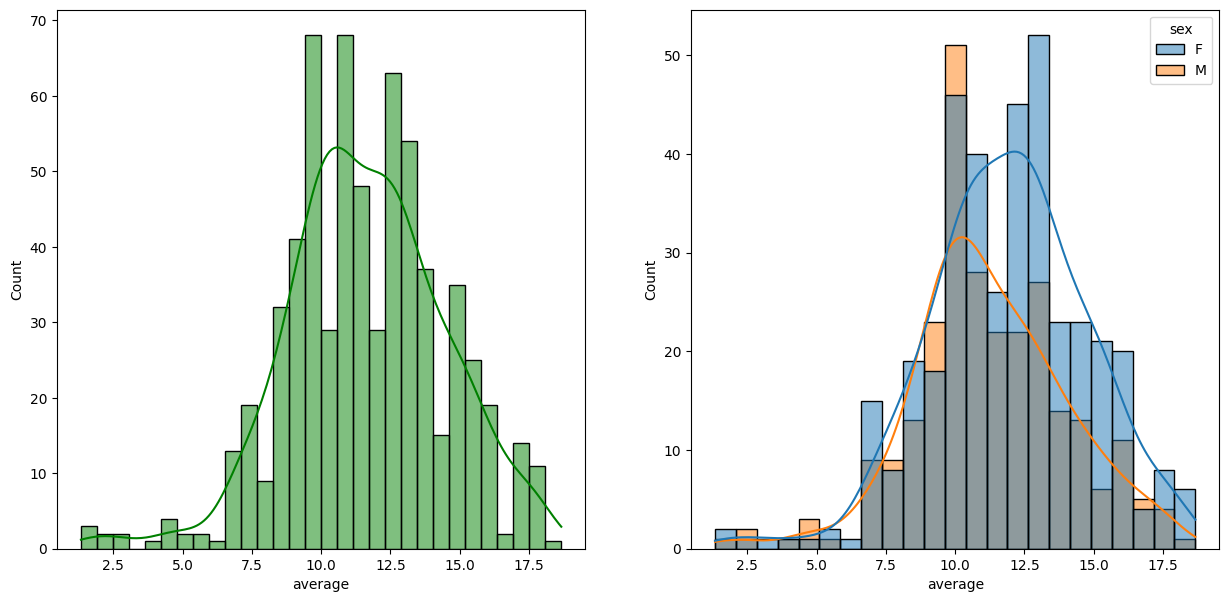

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='sex')
plt.show()

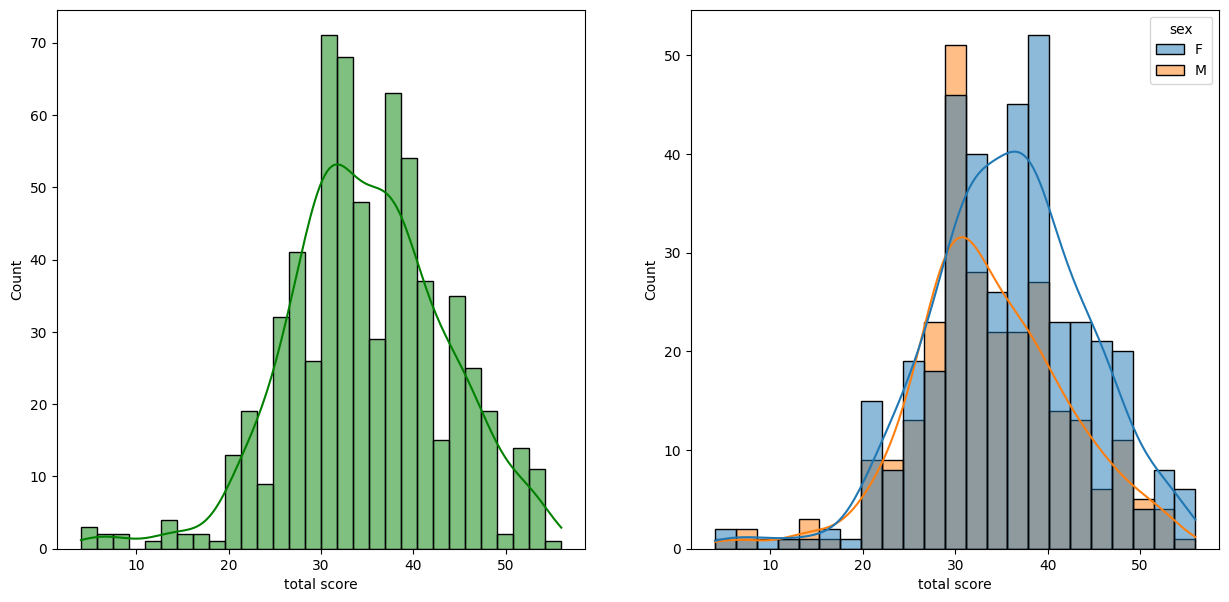

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='sex')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

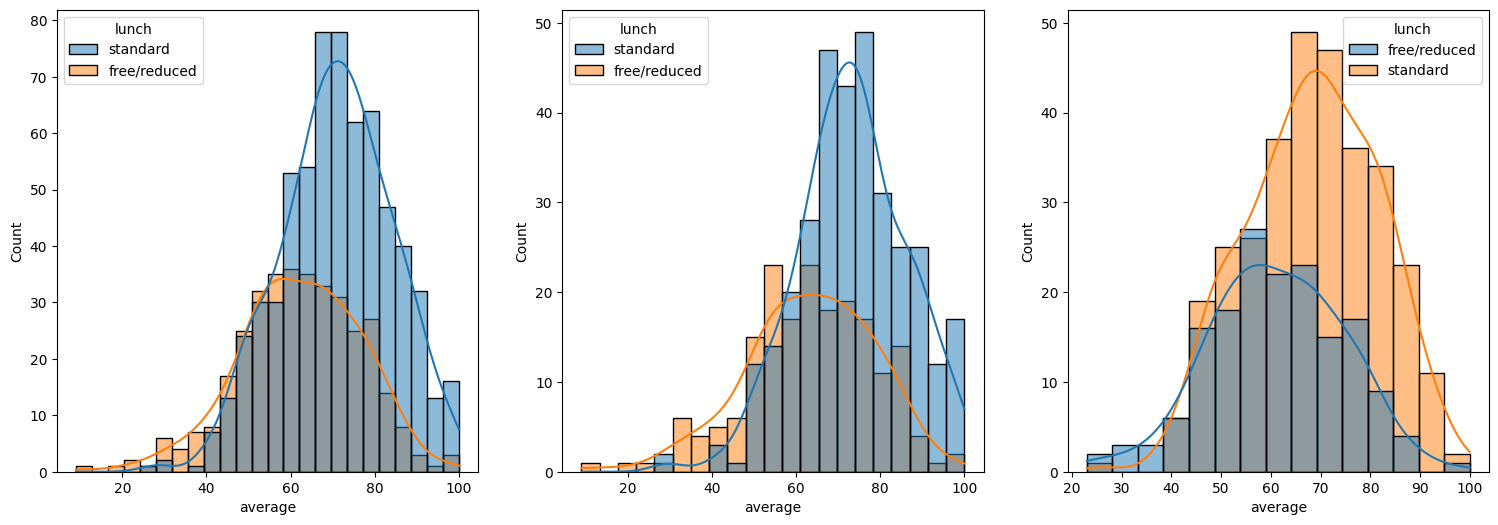

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

In [ ]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [ ]:
gender_group = df.groupby('gender').mean()
gender_group

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [ ]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [ ]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.